0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: kommun, dtype: object
     kommun  population
3  Göteborg      583056
      kommun  population
1  Stockholm      975551
3   Göteborg      583056
2    Uppsala      233839
0      Malmö       34794
      kommun  population
1  Stockholm      975551
3   Göteborg      583056
2    Uppsala      233839
      Kommun  Population  Population (%)
1  Stockholm      975551            9.40
3   Göteborg      583056            5.62
0      Malmö      347949            3.35
2    Uppsala      233839            2.25
   2020  2019 Unnamed: 2  2020.1  2019.1         %
0    83    84        Ale   31868   31402  1.483982
1    64    64   Alingsås   41602   41420  0.439401
2   123   123    Alvesta   20224   20134  0.447005
3   255   255      Aneby    6821    6848 -0.394276
4   169   167     Arboga   14039   14087 -0.340740
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Nul

ValueError: Could not interpret value `Cities` for `x`. An entry with this name does not appear in `data`.

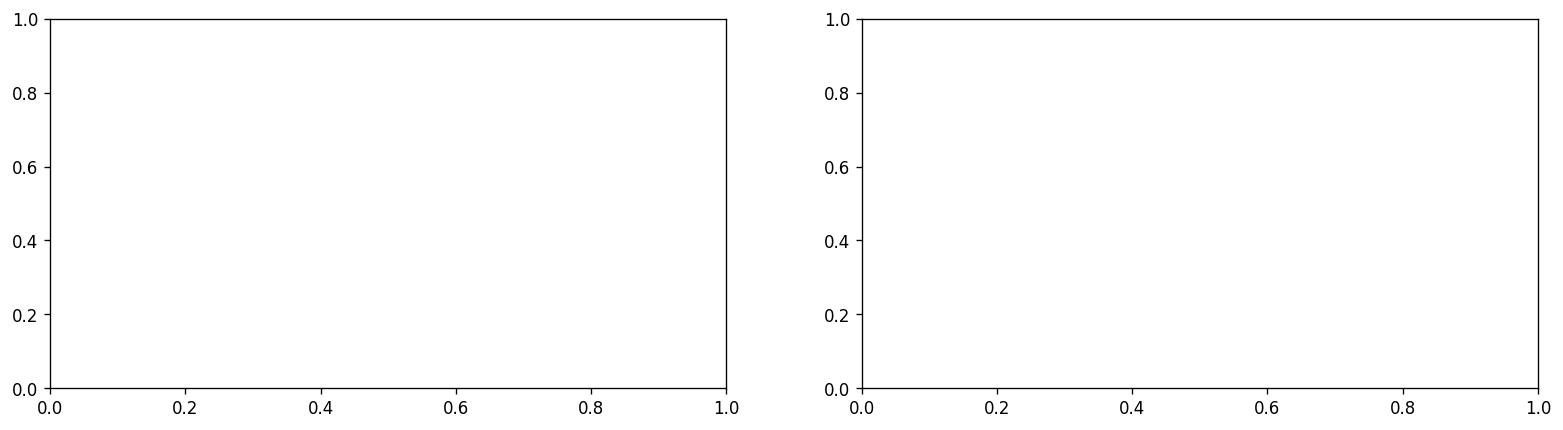

In [6]:
#1.a: Use your Dataframe to print out all the cities:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#serie med matchande nycklar
kommun = pd.Series({0: "Malmö", 1: "Stockholm", 2: "Uppsala", 3: "Göteborg"})
population = pd.Series({0: 34794, 1: 975551, 2: 233839, 3: 583056})

#dataframe

df_programs = pd.DataFrame({
    "kommun": kommun,
    "population": population
})

print(df_programs["kommun"])

#b:Select only the row which contains Göteborg. Do this by using the name Göteborg.

Göteborg_row = df_programs[df_programs["kommun"] == "Göteborg"]

print(Göteborg_row)

#c:Sort the cities by population from largest to smallest.
df = pd.DataFrame({
    "kommun": kommun,
    "population": population
})

#sorterar efter befolkning
kommun_sorted = df.sort_values(by="population", ascending=False)
kommun_top4 = kommun_sorted.iloc[:4]
print(kommun_top4)

#d:Filter out the three largest cities.

kommun_top4 = kommun_sorted.iloc[:3]
print(kommun_top4)

#e:The whole population in Sweden 2020 is 10379295.
#Use this number to create a new column in your sorted DataFrame-
#named: Population (%). This column should be filled with-
#percentage of the Swedish population for each city.

# Create the DataFrame again
kommun = pd.Series({0: "Malmö", 1: "Stockholm", 2: "Uppsala", 3: "Göteborg"})
population = pd.Series({0: 347949, 1: 975551, 2: 233839, 3: 583056})

df_programs = pd.DataFrame({
    "Kommun": kommun,
    "Population": population
})

# Swedish population 2020
total_population = 10379295

# Create new column 'Population (%)'
df_programs["Population (%)"] = (df_programs["Population"] / total_population) * 100

# Optional: round to 2 decimal places
df_programs["Population (%)"] = df_programs["Population (%)"].round(2)

# Sort the DataFrame by Population descending (optional)
df_programs = df_programs.sort_values(by="Population", ascending=False)

print(df_programs)

#2.a: Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB.
#a: Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as:
#df.head()
#df.info()
#df.describe()
#Feel free to do more explorations.

import pandas as pd

path = "komtopp50_2020.xlsx"

df = pd.read_excel(
    path,
    sheet_name="Totalt",     # Read the sheet named "Totalt"
    header=6,                # The real column names start on row 3 (adjust if needed)
    usecols="A:F"            # Read only columns A through F (ignore extra ones)
)

print(df.head())
print(df.info())
print(df.describe())

#b: Clean your data so that the head looks like this, SE ÖVER EXERCISEN, TABELL FINNS DÄR.

df = pd.read_excel(
    path,
    sheet_name="Totalt",     # Read the sheet named "Totalt"
    header=6,                # The real column names start on row 3 (adjust if needed)
    usecols="A:F"            # Read only columns A through F (ignore extra ones)
)

df.columns = df.columns.str.strip()

df.columns = [
    "Rang 2020",
    "Rang 2019",
    "Kommun",
    "Folkmängd 2020",
    "Folkmängd 2019",
    "Förändring"
]

df = df.dropna(subset=["Kommun"])

numeric_cols = ["Rang 2020", "Rang 2019", "Folkmängd 2020", "Folkmängd 2019", "Förändring"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = "coerce")

df = df.reset_index(drop=True)

print(df.head())

#c:Sort the cities by population from largest to smallest.

df_sorted = df.sort_values(by="Folkmängd 2020", ascending=False)
print(df_sorted)

#d:Filter out the five smallest cities.

df_smallest = df_sorted.tail(5)
print(df_smallest)

#e:Use the DataFrame to calculate Sweden's population in 2019 and 2020.

df_2019_2020 = df_smallest[df_smallest["Rang 2020"] == 2019]
print(df_2019_2020)

#f:Plot a bar chart for the five largest cities and the five smallest cities.

fig, axes = plt.subplots(1,2, dpi=120, figsize=(16, 4))

df_largest = df.head(5)

titles = ["Top 5 largest cities", "Top 5 smallest cities"]
data_frames = [df_largest, df_smallest]
x_column = "Cities"

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x=x_column, y="Cities", ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel(title)
    axes[i].set_ylabel(title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()